In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [3]:
#1) Loading of the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# y is shape (N,1) -> make it (N,) for sklearn convenience
y_train = y_train.squeeze()
y_test  = y_test.squeeze()

#creation of a dictionary for the different classes of the objects
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [4]:
# 2) Normalize the training and testing dataset
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

In [5]:
# 3) Data augmentation for the train dataset only
data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.10),
], name="data_augmentation")


In [6]:
#4) Building the CNN model
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    data_aug,

    # Block 1
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    # Block 2
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    # Block 3
    layers.Conv2D(128, 3, padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(128, 3, padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    # Head (fewer params than Flatten -> less overfitting)
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

In [7]:
# 5) Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [8]:
# 6) Model training and callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5)
]

history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 32ms/step - accuracy: 0.3240 - loss: 1.8796 - val_accuracy: 0.5224 - val_loss: 1.3502 - learning_rate: 0.0010
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.5239 - loss: 1.3226 - val_accuracy: 0.5726 - val_loss: 1.2376 - learning_rate: 0.0010
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.5954 - loss: 1.1441 - val_accuracy: 0.5174 - val_loss: 1.6037 - learning_rate: 0.0010
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.6316 - loss: 1.0500 - val_accuracy: 0.6326 - val_loss: 1.2035 - learning_rate: 0.0010
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.6721 - loss: 0.9509 - val_accuracy: 0.7164 - val_loss: 0.8202 - learning_rate: 0.0010
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.6929 - loss: 0.8943 - val_accuracy: 0.7568 - val_loss: 0.7041 - learning_rate: 0.0010
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.7113 - l

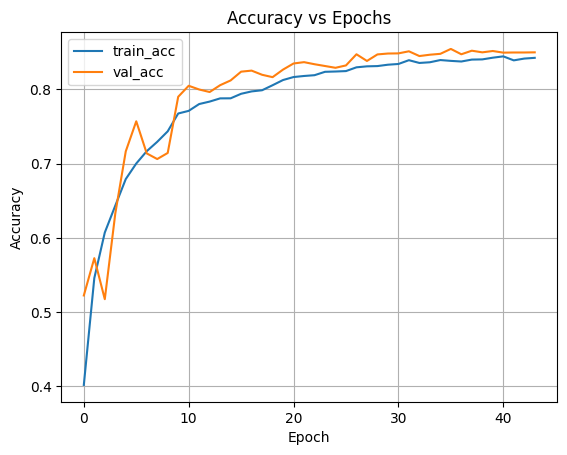

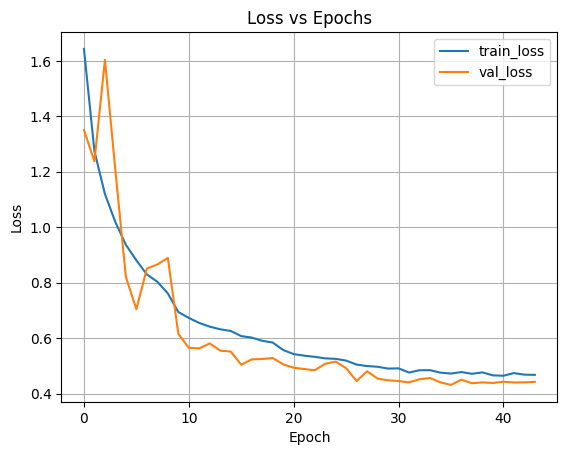

In [9]:
# 7) Plot training curves
def plot_history(hist):
    # Accuracy of the training dataset and validation dataset
    plt.figure()
    plt.plot(hist.history["accuracy"], label="train_acc")
    plt.plot(hist.history["val_accuracy"], label="val_acc")
    plt.title("Accuracy vs Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Loss
    plt.figure()
    plt.plot(hist.history["loss"], label="train_loss")
    plt.plot(hist.history["val_loss"], label="val_loss")
    plt.title("Loss vs Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history)


In [10]:
# 8) Test evaluation
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")


Test loss: 0.4598
Test accuracy: 0.8473



Classification report:
              precision    recall  f1-score   support

    airplane     0.8593    0.8730    0.8661      1000
  automobile     0.9136    0.9520    0.9324      1000
        bird     0.8237    0.7710    0.7965      1000
         cat     0.7602    0.6690    0.7117      1000
        deer     0.8232    0.8150    0.8191      1000
         dog     0.8649    0.7040    0.7762      1000
        frog     0.7381    0.9470    0.8296      1000
       horse     0.9082    0.8900    0.8990      1000
        ship     0.9317    0.9140    0.9228      1000
       truck     0.8701    0.9380    0.9028      1000

    accuracy                         0.8473     10000
   macro avg     0.8493    0.8473    0.8456     10000
weighted avg     0.8493    0.8473    0.8456     10000



<Figure size 800x800 with 0 Axes>

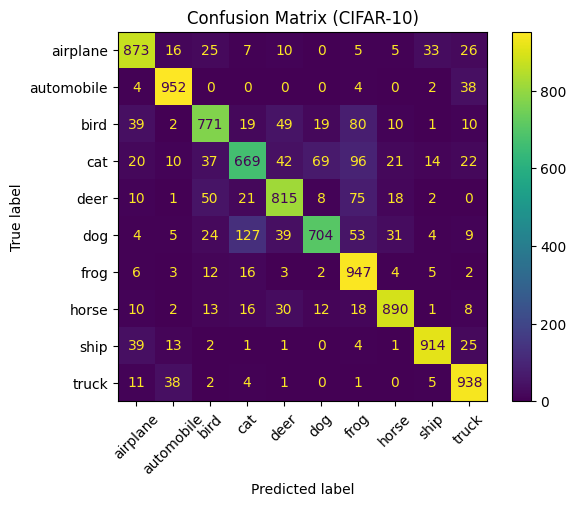

In [11]:
# 9) Confusion matrix + report
y_prob = model.predict(x_test, verbose=0)          # shape (N,10)
y_pred = np.argmax(y_prob, axis=1)                # predicted class index (N,)

print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=class_names, digits=4))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(8, 8))
disp.plot(values_format="d", xticks_rotation=45)
plt.title("Confusion Matrix (CIFAR-10)")
plt.show()

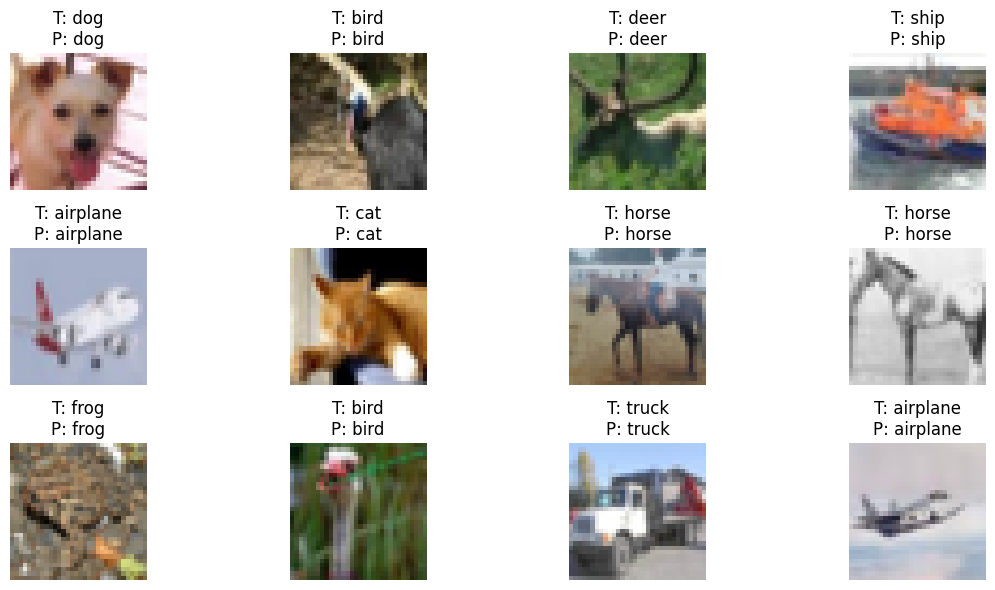

In [12]:
# 10) Visualize a few predictions
def show_predictions(images, true_labels, pred_labels, n=12):
    idx = np.random.choice(len(images), size=n, replace=False)
    plt.figure(figsize=(12, 6))
    for i, k in enumerate(idx, start=1):
        plt.subplot(3, 4, i)
        plt.imshow(images[k])
        t = class_names[true_labels[k]]
        p = class_names[pred_labels[k]]
        plt.title(f"T: {t}\nP: {p}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_predictions(x_test, y_test, y_pred, n=12)

In [13]:
# 11) Summary (for reporting)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 918,016 (3.50 MB)

 Trainable params: 305,706 (1.17 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 611,414 (2.33 MB)

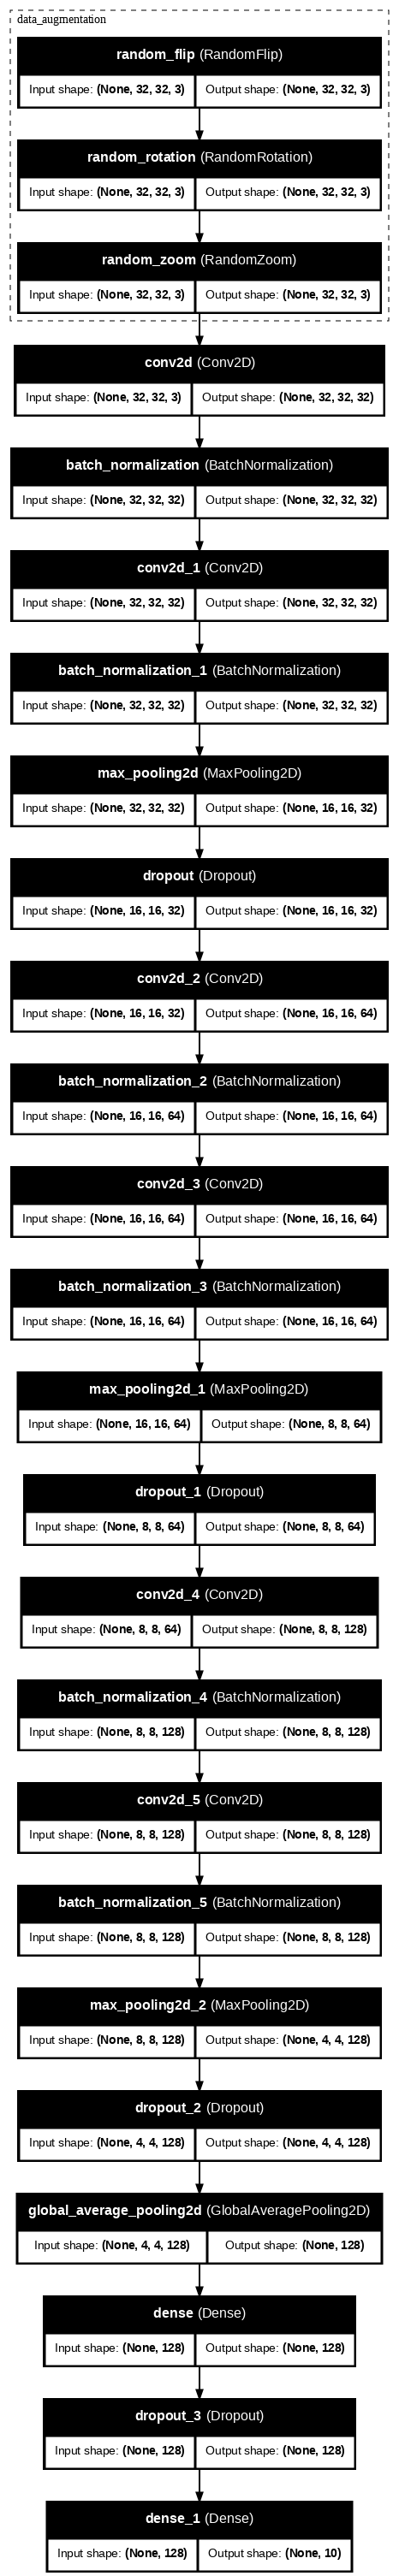

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    to_file="cnn_cifar10_architecture.png",
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=72   # lower DPI → smaller image
)

